<a href="https://colab.research.google.com/github/ManavKaul/Sparks_Superstore/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **THE PROJECT IS BEING PERFORMED UNDER Graduate Rotational Internship Program of The Sparks Foundation**

The Aim is to:

Perform ‘Exploratory Data Analysis’ on dataset ‘Sample Store’ provided by them

As business manager, try to find weak areas where you can work to make more profit

Identify problems

In [1]:
#Importing all the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the CSV file provided by The Sparks Foundation containing details related to Terrorism
df= pd.read_csv('SampleSuperstore.csv')

In [3]:
df.shape

(9994, 13)

There are 9994 customers

In [4]:
#Statistical Summary of Dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
#Reading the top 5 rows of data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#Reading the last 5 rows of data
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# **Ship Mode**

In [7]:
print(df["Ship Mode"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


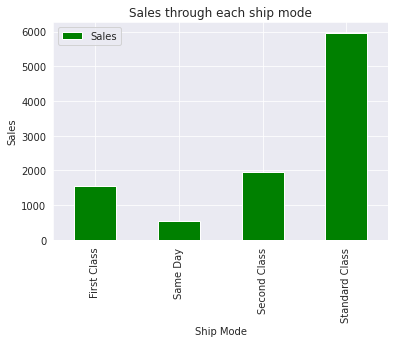

In [8]:
sns.set_style('darkgrid')
ShipMode_Sales =df[['Ship Mode', 'Sales']].groupby(['Ship Mode'],sort = True).count()
ShipMode_Sales.plot(kind='bar',color=['g'])
plt.ylabel('Sales')
plt.title("Sales through each ship mode")
plt.show()

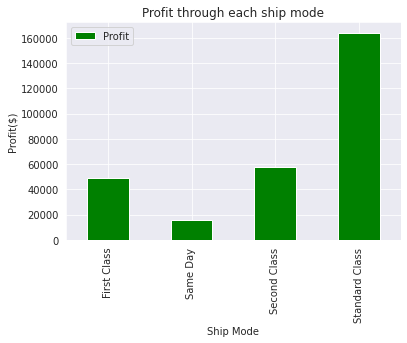

In [9]:
ShipMode_Profit =df[['Ship Mode', 'Profit']].groupby(['Ship Mode'],sort = True).sum()
ShipMode_Profit.plot(kind='bar',color=['g'])
plt.ylabel('Profit($)')
plt.title("Profit through each ship mode")
plt.show()

## **Segment**

In [10]:
print(df["Segment"].unique())

['Consumer' 'Corporate' 'Home Office']


In [11]:
Consumer=0
Corporate=0
HO=0
for i in range(9994):
  if df["Segment"][i]=='Consumer':
    Consumer= Consumer+1
  elif df["Segment"][i]== 'Corporate':
    Corporate= Corporate+1
  elif df["Segment"][i]== 'Home Office':
   HO= HO+1

Number of buyers from each segment


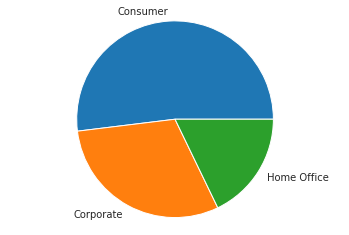

<Figure size 3600x3600 with 0 Axes>

In [12]:
plt.pie([Consumer,Corporate,HO], labels=['Consumer', 'Corporate', 'Home Office'],radius=40)
plt.axis('equal')
print('Number of buyers from each segment')
plt.figure(figsize=(50,50))
plt.show()

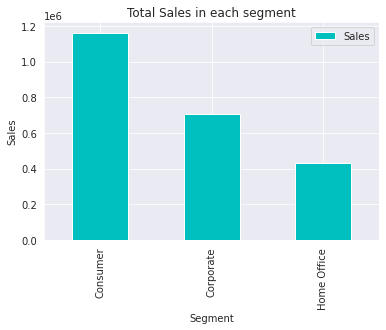

In [13]:
Segment_Sales =df[['Segment', 'Sales']].groupby(['Segment'],sort = True).sum()
Segment_Sales.plot(kind='bar',color='c')
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.title("Total Sales in each segment")
plt.show()

**Breaking down on the basis of both Segment and Ship Mode**

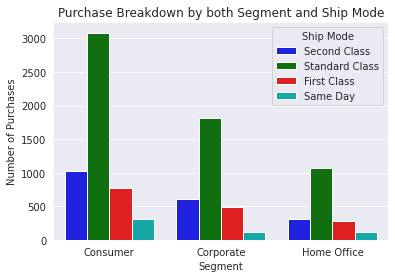

<Figure size 3600x7200 with 0 Axes>

In [14]:
sns.countplot(df['Segment'],hue=df['Ship Mode'],palette =['b','g','r','c'])
plt.xlabel("Segment")
plt.ylabel("Number of Purchases")
plt.title("Purchase Breakdown by both Segment and Ship Mode")
plt.figure(figsize=(50,100))
plt.show()

## **COUNTRY**

In [15]:
print(df["Country"].unique())

['United States']


## **CITY**

In [16]:
print(df["City"].unique())

['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 'Saint Petersburg'

In [17]:
print('City with most sales:\n',df[['City', 'Sales']].max(),'\n')
print('City with least sales:\n',df[['City', 'Sales']].min(),'\n')
print('Mean Sales\n',df[['City', 'Sales']].mean(),'\n')

City with most sales:
 City        Yuma
Sales    22638.5
dtype: object 

City with least sales:
 City     Aberdeen
Sales       0.444
dtype: object 

Mean Sales
 Sales    229.858001
dtype: float64 



In [18]:
print('City with most volume sold:\n',df[['City', 'Quantity']].max(),'\n')
print('City with least volume sold:\n',df[['City', 'Quantity']].min(),'\n')
print('Mean Quantity of items sold\n',df[['City', 'Quantity']].mean(),'\n')

City with most volume sold:
 City        Yuma
Quantity      14
dtype: object 

City with least volume sold:
 City        Aberdeen
Quantity           1
dtype: object 

Mean Quantity of items sold
 Quantity    3.789574
dtype: float64 



In [19]:
print('City with most discount:\n',df[['City', 'Discount']].max(),'\n')
print('City with least discount:\n',df[['City', 'Discount']].min(),'\n')
print('Mean Discount\n',df[['City', 'Discount']].mean(),'\n')

City with most discount:
 City        Yuma
Discount     0.8
dtype: object 

City with least discount:
 City        Aberdeen
Discount           0
dtype: object 

Mean Discount
 Discount    0.156203
dtype: float64 

